In [128]:
import numpy as np 
import pandas as pd

In [129]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

%matplotlib inline 

## <u><strong> Importing Data </u></strong>

In [130]:
data=pd.read_csv("data.csv")

In [131]:
## Making Copy of data 

df=data.copy()

## <u><strong> Data Analysis and Preprocessing</strong></u>

In [132]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [133]:
print(f'Number of Features in Data : {df.shape[1]}')
print('')
print(f'Number of Records in data : {df.shape[0]}')

Number of Features in Data : 16

Number of Records in data : 11914


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [135]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [136]:
def explain(df):
    d={}
    l=[]
    l1=[]
    for i in df.columns:
        d[i]=df[i].unique()
        l.append(df[i].nunique())
        l1.append(df[i].isna().sum())
        
    explain_df=pd.DataFrame(data=d.items(),columns=['features','unique_items'])
    
    explain_df['no_of_unique_items']=pd.Series(l)
    explain_df['no_of_missing_items']=pd.Series(l1)
    
    explain_df['%_of_missing_items']=round((explain_df['no_of_missing_items']/len(df))*100,2)
    
    return explain_df

In [137]:
explain(df)

,features,unique_items,no_of_unique_items,no_of_missing_items,%_of_missing_items
0,Make,"[BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nis...",48,0,0.00
1,Model,"[1 Series M, 1 Series, 100, 124 Spider, 190-Cl...",915,0,0.00
2,Year,"[2011, 2012, 2013, 1992, 1993, 1994, 2017, 199...",28,0,0.00
3,Engine Fuel Type,"[premium unleaded (required), regular unleaded...",10,3,0.03
4,Engine HP,"[335.0, 300.0, 230.0, 320.0, 172.0, 160.0, 130...",356,69,0.58
5,Engine Cylinders,"[6.0, 4.0, 5.0, 8.0, 12.0, 0.0, nan, 10.0, 3.0...",9,30,0.25
6,Transmission Type,"[MANUAL, AUTOMATIC, AUTOMATED_MANUAL, DIRECT_D...",5,0,0.00
7,Driven_Wheels,"[rear wheel drive, front wheel drive, all whee...",4,0,0.00
8,Number of Doors,"[2.0, 4.0, 3.0, nan]",3,6,0.05
9,Market Category,"[Factory Tuner,Luxury,High-Performance, Luxury...",71,3742,31.41


* Droppping **Market Category** due to Large amount of Missing Data so we will not be able to produce any answers.

In [138]:
df.drop('Market Category',axis=1,inplace=True)

In [139]:
df.duplicated().value_counts()

False    11194
True       720
dtype: int64

In [140]:
df.drop_duplicates(inplace=True,keep="first")

### <u> Correlation </u>

In [141]:
corr_matrix=df.corr()

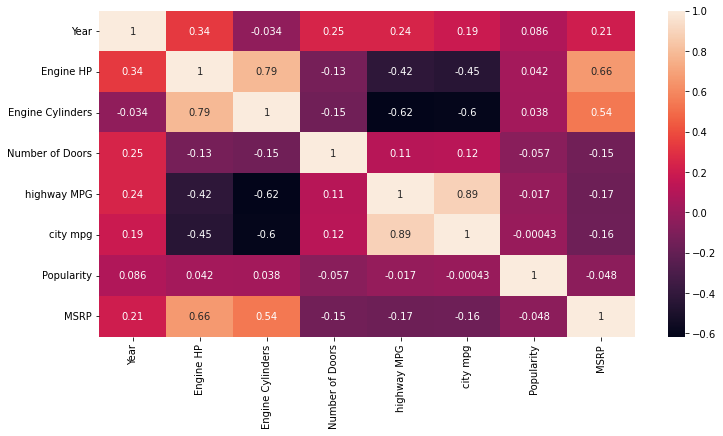

In [142]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True)

### Correlated Columns: 
  * **Engine HP** and **Engine Cylinders** 
  * **Highway MPG** and **City MPG**

* Dropping columns to remove Multicolinearity

In [143]:
df.drop(['Engine HP','city mpg'],axis=1,inplace=True)

### <u> Dealing with Missing Values </u>

In [144]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
Popularity            0
MSRP                  0
dtype: int64

In [145]:
df['Engine Fuel Type'].mode()

0    regular unleaded
dtype: object

In [146]:
df['Engine Fuel Type'].fillna(value='regular unleaded',inplace=True)

In [147]:
df['Engine Cylinders'].mode()

0    4.0
dtype: float64

In [148]:
df['Engine Cylinders'].fillna(value=4.0,inplace=True)

In [149]:
df['Number of Doors'].mode()

0    4.0
dtype: float64

In [150]:
df['Number of Doors'].fillna(value=4.0,inplace=True)

In [151]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
Popularity           0
MSRP                 0
dtype: int64

### <u> Outliers </u>

In [152]:
def limits(x):
  q1=np.percentile(df[x],25)
  q3=np.percentile(df[x],75)

  IQR=q3-q1

  up_lim=q3+(1.5*IQR)
  low_lim=q1-(1.5*IQR)

  return low_lim,up_lim

In [153]:
d={}  
for i in ['Engine Cylinders', 'Number of Doors', 'highway MPG', 'Popularity', 'MSRP']:
  u,l=limits(i)
  d[i]=[u,l]

In [154]:
d

{'Engine Cylinders': [1.0, 9.0],
 'MSRP': [-10560.0, 75198.0],
 'Number of Doors': [-1.0, 7.0],
 'Popularity': [-1641.0, 4199.0],
 'highway MPG': [10.0, 42.0]}

### <u> Top 10 in Price Outlier </u>

In [155]:
for i in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style','Year','Number of Doors','Engine Cylinders']:
  print(f'___________Outlier Price % Distribution of {i}______________')
  ax=df[(df['MSRP']<0) | (df["MSRP"]>75198)][i].value_counts(normalize=True).sort_values(ascending=False).head(10)
  print(round(ax*100,2))
  print('')

___________Outlier Price % Distribution of Make______________
Mercedes-Benz    10.64
BMW               9.70
Porsche           9.70
Aston Martin      9.49
Cadillac          8.55
Bentley           7.72
Ferrari           7.19
Lamborghini       5.42
Maserati          5.32
Audi              5.11
Name: Make, dtype: float64

___________Outlier Price % Distribution of Model______________
911             6.05
Range Rover     3.65
V8 Vantage      3.34
Escalade ESV    3.02
Gallardo        2.61
Escalade        2.61
R8              2.61
6 Series        2.50
S-Class         2.50
Panamera        2.29
Name: Model, dtype: float64

___________Outlier Price % Distribution of Engine Fuel Type______________
premium unleaded (required)                  82.27
premium unleaded (recommended)                5.94
flex-fuel (premium unleaded required/E85)     5.11
regular unleaded                              2.71
flex-fuel (unleaded/E85)                      2.50
electric                                      1.0

In [156]:
df['Engine Cylinders']=np.where(df['Engine Cylinders']>9,9,
                                np.where(df['Engine Cylinders']<1,1,df['Engine Cylinders']))

In [157]:
df['MSRP']=np.where(df['MSRP']>76000,76000,
                                np.where(df['MSRP']<0,0,df['MSRP']))

In [158]:
df['Number of Doors']=np.where(df['Number of Doors']>7,7,
                                np.where(df['Number of Doors']<1,1,df['Number of Doors']))

In [159]:
df['Popularity']=np.where(df['Popularity']>4200,4200,
                                np.where(df['Popularity']<0,0,df['Popularity']))

In [160]:
df['highway MPG']=np.where(df['highway MPG']>42.0,42.0,
                                np.where(df['highway MPG']<10.0,10.0,df['highway MPG']))

### <u> Columns </u>

In [161]:
cat_cols=[col for col in df.columns if df[col].dtype=='O']
num_cols=[col for col in df.columns if df[col].dtype!='O']

In [162]:
print(f'Number of Categorical Columns: {len(cat_cols)}')
print(" ")
print(cat_cols)

Number of Categorical Columns: 7
 
['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']


In [163]:
print(f'Number of Numerical Columns: {len(num_cols)}')
print(" ")
print(num_cols)

Number of Numerical Columns: 6
 
['Year', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'Popularity', 'MSRP']


### <u> Percentage Distribution of Categories <u>

In [164]:
for i in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style','Year','Number of Doors','Engine Cylinders']:
  print(f'__________Percentage distribution of Categories in {i}__________')
  print(round(df[i].value_counts(normalize=True).sort_values(ascending=False)*100,2))
  print(" ")

__________Percentage distribution of Categories in Make__________
Chevrolet        9.67
Ford             7.36
Toyota           6.40
Volkswagen       5.07
Nissan           4.92
Dodge            4.72
GMC              4.31
Honda            3.87
Mazda            3.68
Cadillac         3.54
Suzuki           3.06
Mercedes-Benz    3.05
Infiniti         2.93
BMW              2.89
Audi             2.87
Volvo            2.38
Hyundai          2.31
Acura            2.20
Subaru           2.14
Kia              2.05
Mitsubishi       1.86
Lexus            1.80
Buick            1.70
Chrysler         1.67
Pontiac          1.62
Lincoln          1.43
Land Rover       1.24
Porsche          1.21
Oldsmobile       1.18
Saab             0.97
Aston Martin     0.81
Bentley          0.66
Plymouth         0.63
Ferrari          0.62
FIAT             0.55
Scion            0.54
Maserati         0.49
Lamborghini      0.46
Rolls-Royce      0.28
Lotus            0.25
Tesla            0.16
HUMMER           0.15
Maybach   

### <u> Brands and Type</u>

In [165]:
gp=df.groupby('Make')['Vehicle Style'].value_counts(normalize=True)
print(round(gp*100,2))
print(" ")

Make   Vehicle Style
Acura  Sedan            50.00
       4dr SUV          25.20
       2dr Hatchback    11.38
       Coupe             8.13
       4dr Hatchback     2.85
                        ...  
Volvo  Wagon            34.59
       4dr SUV          25.94
       2dr Hatchback     2.26
       Convertible       1.13
       Coupe             1.13
Name: Vehicle Style, Length: 287, dtype: float64
 


## <u><strong> Data Vizualization </strong></u>

### <u> Most Frequent </u>

In [166]:
for i in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style','Year','Number of Doors','Engine Cylinders']:

  gp=df[i].value_counts().sort_values(ascending=False).head(20)

  fig=px.bar(gp,title=f'Top Most Frequent {i}',color='value')
  fig.show()

### <u> Least Frequent </u>

In [167]:
for i in ['Make','Model','Year']:

  gp=df[i].value_counts().sort_values(ascending=True).head(20)

  fig=px.bar(gp,title=f'Top Least Frequent {i}',color='value')
  fig.show()

### <u> Price </u>

In [168]:
for i in ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style','Year','Number of Doors','Engine Cylinders']:
  gp=df.groupby(i)['MSRP'].mean().sort_values(ascending=False).head(20)
  fig=px.bar(gp,title=f'Top 15 {i} with Heighest Average Price',color='value')
  fig.show()

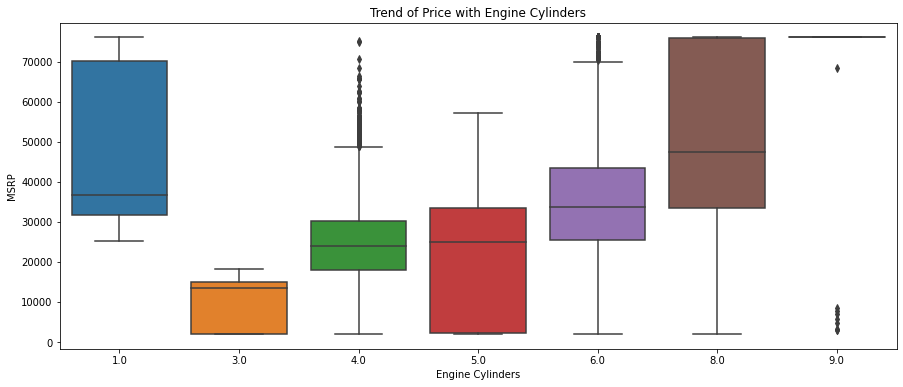

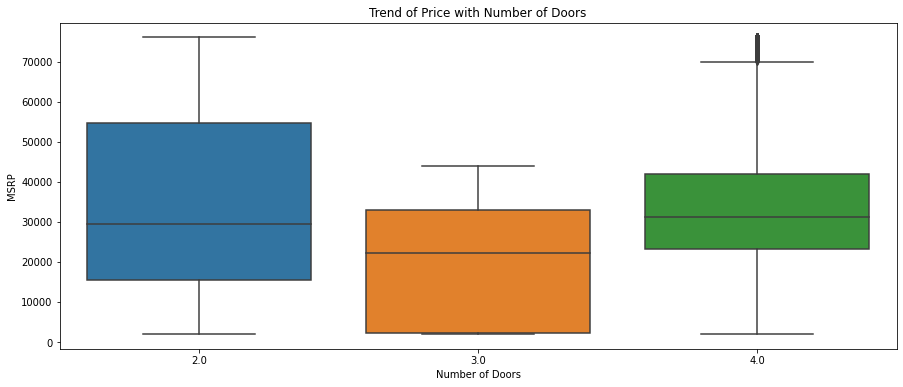

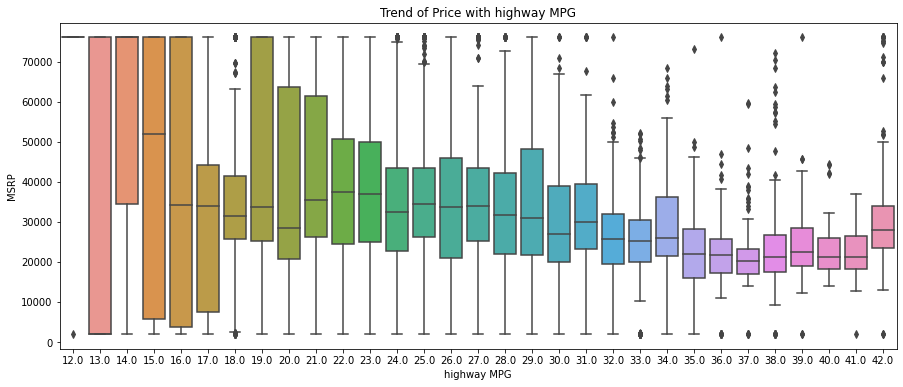

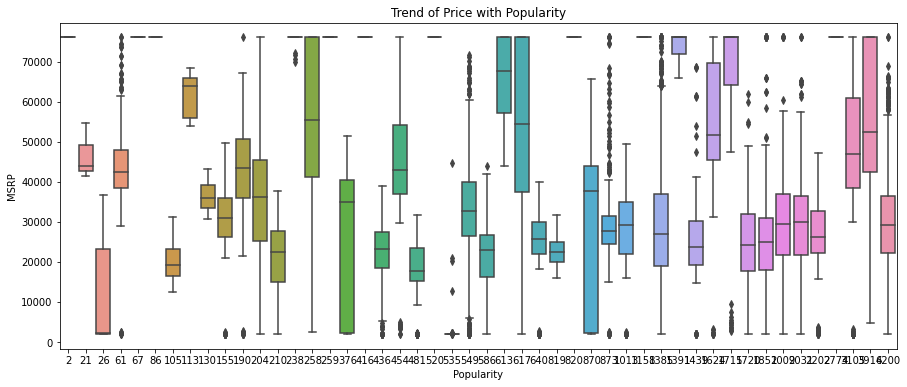

In [169]:
for i in ['Engine Cylinders','Number of Doors','highway MPG','Popularity']:
  plt.figure(figsize=(15,6))
  plt.title(f"Trend of Price with {i}")
  sns.boxplot(x=i,y="MSRP",data=df)
  

### <u> Highway MPG </u>

In [170]:
for i in cat_cols:

  gp=df.groupby(i)['highway MPG'].mean().sort_values(ascending=False).head(10)
  fig=px.bar(gp,title=f'Top 10 {i} with Heighest Mean Highway MPG',color='value')
  fig.show()

## <u><strong> Spliting the data </strong></u>

In [171]:
X=df.drop('MSRP',axis=1)

y=df['MSRP']

In [172]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## <u> Feature Selection </u>

In [173]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,Popularity
4201,Ford,Escape,2016,premium unleaded (recommended),4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,29.0,4200
968,Porsche,911,2017,premium unleaded (required),6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,28.0,1715
7755,Audi,Q3,2016,premium unleaded (recommended),4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28.0,3105
5267,Maserati,Ghibli,2015,premium unleaded (required),6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Sedan,25.0,238
407,Mazda,3,2017,regular unleaded,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,37.0,586


In [174]:
X_train_encoded=pd.get_dummies(data=X_train,columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'])

### <u> Anova Test </u>

In [175]:
from sklearn.feature_selection import SelectKBest,f_regression

In [176]:
selector=SelectKBest(f_regression,k=30)

In [177]:
selector.fit(X_train_encoded,y_train)

SelectKBest(k=30, score_func=<function f_regression at 0x7fdf83f13cb0>)

In [178]:
feat_score=pd.DataFrame(data=selector.scores_,columns=['feat_scores'],index=X_train_encoded.columns)

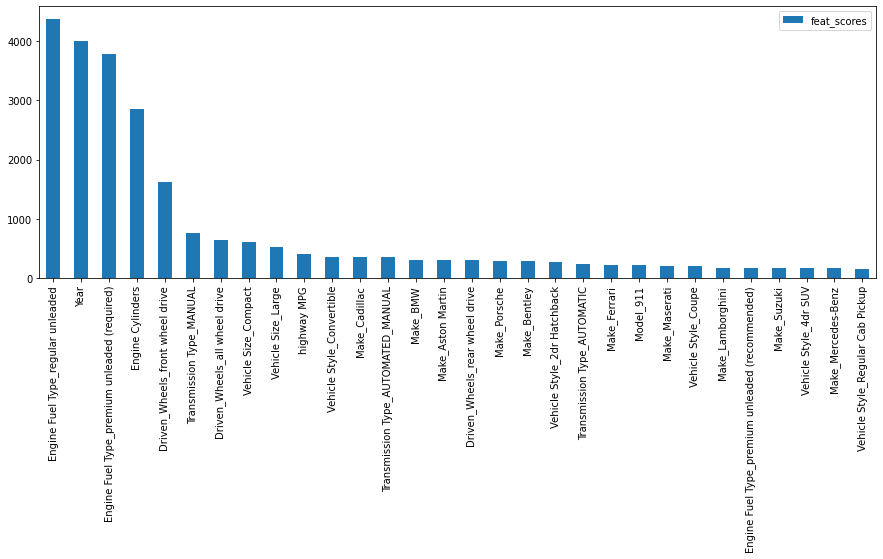

In [179]:
feat_score.sort_values(by='feat_scores',ascending=False).head(30).plot.bar(figsize=(15,5))

### Top Categories :
  * **Make** : **Cadillac, BMW, Aston Martin, Porsche, Bentley, Ferrai, Maserati, Lamborghini,Suzuki, Mercedes-Benz**

  * **Transmission**: **MANUAL, ATUOMATED_MANUAL, ATOMATIC**

  * **Engine Fuel Type** : **regular unleaded, premium regular unleaded(required), premium unleaded (recommended)**

  * **Vehicle Style**: **Convertible, 2dr Hatchbak, Coupe, 4dr SUV, Regular Cab Pickup**

In [180]:
X_train.drop('Model',axis=1,inplace=True)

X_test.drop('Model',axis=1,inplace=True)

In [181]:
def make(x):
  if x not in ['Cadillac', 'BMW', 'Aston Martin', 'Porsche', 'Bentley', 'Ferrai', 'Maserati', 'Lamborghini', 'Suzuki', 'Mercedes-Benz']:
    return "Other"
  else:
    return x

In [182]:
def transmission(x):
  if x not in ['MANUAL',"AUTOMATED_MANUAL","AUTOMATIC"]:
    return "Other"
  else:
    return x

In [183]:
def engine_fuel_type(x):
  if x not in ['regular unleaded', 'premium unleaded (required)', 'premium unleaded (recommended)']:
    return "Other"
  else:
    return x

In [184]:
def style(x):
  if x not in ['Coupe', 'Convertible', '4dr Hatchback', '4dr SUV', 'Regular Cab Pickup']:
    return "Other"
  else:
    return x


In [185]:
X_train['Make']=X_train['Make'].apply(make)

X_train['Transmission Type']=X_train['Transmission Type'].apply(transmission)

X_train['Engine Fuel Type']=X_train['Engine Fuel Type'].apply(engine_fuel_type)

X_train['Vehicle Style']=X_train['Vehicle Style'].apply(style)

In [186]:
X_test['Make']=X_test['Make'].apply(make)

X_test['Transmission Type']=X_test['Transmission Type'].apply(transmission)

X_test['Engine Fuel Type']=X_test['Engine Fuel Type'].apply(engine_fuel_type)

X_test['Vehicle Style']=X_test['Vehicle Style'].apply(style)

In [187]:
X_train.head()

,Make,Year,Engine Fuel Type,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,Popularity
4201,Other,2016,premium unleaded (recommended),4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,29.0,4200
968,Porsche,2017,premium unleaded (required),6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,28.0,1715
7755,Other,2016,premium unleaded (recommended),4.0,AUTOMATIC,all wheel drive,4.0,Compact,4dr SUV,28.0,3105
5267,Maserati,2015,premium unleaded (required),6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Other,25.0,238
407,Other,2017,regular unleaded,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Other,37.0,586


### <u> Creating Transformers </u>

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 

In [189]:
transformer_dis=ColumnTransformer([
                                   ('encoder',OneHotEncoder(drop="first",sparse=False),['Make','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']),
                                   ('scaler',StandardScaler(),['highway MPG','Popularity'])
],remainder="passthrough")

In [190]:
transformer=ColumnTransformer([
                                   ('encoder',OneHotEncoder(drop="first",sparse=False),['Make','Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style'])
],remainder="passthrough")

## <u><strong>  Machine Learning </strong></u>

In [191]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [192]:
from sklearn import set_config

set_config(display="diagram")

In [193]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [194]:
def evaluate(y_pred):
  mse=mean_squared_error(y_test,y_pred)
  print(f'RMSE: {np.sqrt(mse)}')
  
  r2=r2_score(y_test,y_pred)
  print(f'R2_Score: {round(r2*100,2)}')

### <u> Linear Regression </u>

In [195]:
pipe_lr=Pipeline([
                  ('transformer',transformer_dis),
                  ('lr',LinearRegression())
])

In [196]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('lr', LinearRegression())])

In [197]:
y_pred_lr=pipe_lr.predict(X_test)

In [198]:
evaluate(y_pred_lr)

RMSE: 8689.61171769893
R2_Score: 81.46


### <u> Ridge Regression </u>

In [199]:
pipe_ridge=Pipeline([
                     ('transformer',transformer_dis),
                     ('ridge',Ridge())
])

In [200]:
pipe_ridge.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('ridge', Ridge())])

In [201]:
y_pred_ridge=pipe_ridge.predict(X_test)

In [202]:
evaluate(y_pred_ridge)

RMSE: 8689.266282301816
R2_Score: 81.46


### <u> Lasso </u>

In [203]:
pipe_lasso=Pipeline([
                     ('transformer',transformer_dis),
                     ('ridge',Lasso())
])

In [204]:
pipe_lasso.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('ridge', Lasso())])

In [205]:
y_pred_lasso=pipe_lasso.predict(X_test)

In [206]:
evaluate(y_pred_lasso)

RMSE: 8689.643086655647
R2_Score: 81.46


### <u> SGD Regressor </u>

In [207]:
pipe_sgd=Pipeline([
                     ('transformer',transformer_dis),
                     ('ridge',SGDRegressor())
])

In [208]:
pipe_sgd.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('ridge', SGDRegressor())])

In [209]:
y_pred_sgd=pipe_sgd.predict(X_test)

In [210]:
evaluate(y_pred_sgd)

RMSE: 567703136990624.9
R2_Score: -7.913125488658333e+22


### <u> Decision Tree </u>

In [211]:
pipe_dt=Pipeline([
                  ('transformer',transformer),
                  ('dt',DecisionTreeRegressor())
])

In [212]:
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('dt', DecisionTreeRegressor())])

In [213]:
y_pred_dt=pipe_dt.predict(X_test)

In [214]:
evaluate(y_pred_dt)

RMSE: 4238.2341795594
R2_Score: 95.59


### <u> Random Forest </u>

In [215]:
pipe_rf=Pipeline([
                  ('transformer',transformer),
                  ('dt',RandomForestRegressor())
])

In [216]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('dt', RandomForestRegressor())])

In [217]:
y_pred_rf=pipe_rf.predict(X_test)

In [218]:
evaluate(y_pred_rf)

RMSE: 3736.7009443877564
R2_Score: 96.57


### <u> KNN Regressor </u>

In [219]:
pipe_knn=Pipeline([
                  ('transformer',transformer_dis),
                  ('dt',KNeighborsRegressor())
])

In [220]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('dt', KNeighborsRegressor())])

In [221]:
y_pred_knn=pipe_knn.predict(X_test)

In [222]:
evaluate(y_pred_knn)

RMSE: 4895.259449973827
R2_Score: 94.12


### <u> SVM </u>

In [223]:
pipe_svm=Pipeline([
                  ('transformer',transformer_dis),
                  ('dt',SVR())
])

In [224]:
pipe_svm.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style']),
                                                 ('scaler', StandardScaler(),
                                                  ['highway MPG',
                                                   'Popularity'])])),
                ('dt', SVR())])

In [225]:
y_pred_svm=pipe_svm.predict(X_test)

In [226]:
evaluate(y_pred_svm)

RMSE: 20350.775249201688
R2_Score: -1.69


### <u> XGB Regressor </u> 

In [227]:
pipe_xgb=Pipeline([
                  ('transformer',transformer),
                  ('dt',XGBRegressor())
])

In [228]:
pipe_xgb.fit(X_train,y_train)

[15:54:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Make', 'Engine Fuel Type',
                                                   'Transmission Type',
                                                   'Driven_Wheels',
                                                   'Vehicle Size',
                                                   'Vehicle Style'])])),
                ('dt', XGBRegressor())])

In [229]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [230]:
evaluate(y_pred_xgb)

RMSE: 6014.6911901322255
R2_Score: 91.12


### Random Forest Regressor Gave the Lowest Root Mean Square Error so We are going to use it 

In [231]:
import pickle

pickle.dump(pipe_rf,open('CarPricePredictor.pkl','wb'))